In [1]:
import os 
import scipy.io 
import matplotlib.pyplot as plt 
import numpy as np
import sys 
sys.path.append("../")

import scienceplots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
from utils import relative_err
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
from matplotlib.text import Text

In [2]:
data_root = '../data'
mesh_path = os.path.join(data_root, 'mesh3D_box_17.mat')
ys = scipy.io.loadmat(mesh_path)['X']
xs = scipy.io.loadmat(mesh_path)['X']

from utils import load_log3d_kernel_dataset
fTrain, fTest, uTrain, uTest, X, Gref = load_log3d_kernel_dataset(
    data_root='../data', nTrain=3000, nTest=1000)

estimate log(r) kernel


In [3]:
# Gpred = np.load(
#             "../results/logsin3D/oga+-512-3000-relu/Goga.npy", allow_pickle=True)

In [4]:
# Gpred.shape[0] ** 0.5

In [5]:
# plt.imshow(Gpred.reshape(4913, 4913))

In [14]:
def vis_3D_result(task, idx, outnm=None):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,3).flatten()
    ax1 = subfigs[0].add_subplot(projection='3d')
    ax2 = subfigs[1].add_subplot(projection='3d')
    ax3 = subfigs[2].add_subplot(projection='3d')

    if task == 'log3D':
        from utils import load_log3d_kernel_dataset
        fTrain, fTest, uTrain, uTest, X, Gref = load_log3d_kernel_dataset(
            data_root='../data', nTrain=3000, nTest=1000)
        upred = np.load(
            "../results/log3D/ogapw-513-3000-relu/upred.npy", allow_pickle=True)
        Gpred = np.load(
            "../results/log3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)
    elif task == 'logsin3D':
        from utils import load_logsin3d_kernel_dataset
        fTrain, fTest, uTrain, uTest, X, Gref = load_logsin3d_kernel_dataset(
            data_root='../data', nTrain=3000, nTest=1000)
        upred = np.load(
            "../results/logsin3D/ogapw-513-3000-relu/upred.npy", allow_pickle=True) 
        Gpred = np.load(
            "../results/logsin3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)
    elif task == 'logcos3D':
        from utils import load_logcos3d_kernel_dataset
        fTrain, fTest, uTrain, uTest, X, Gref = load_logcos3d_kernel_dataset(
            data_root='../data', nTrain=3000, nTest=1000)
        upred = np.load(
            "../results/logcos3D/ogapw-513-3000-relu/upred.npy", allow_pickle=True) 
        Gpred = np.load(
            "../results/logcos3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)
    elif task == 'cos3D':
        from utils import load_cos3d_kernel_dataset
        fTrain, fTest, uTrain, uTest, X, Gref = load_cos3d_kernel_dataset(
            data_root='../data', nTrain=3000, nTest=1000)
        upred = np.load(
            "../results/cos3D/ogapw-513-3000-relu/upred.npy", allow_pickle=True) 
        Gpred = np.load(
            "../results/cos3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)
    
    # h = 1/fTest.shape[0]
    # upred = h * (Gpred @ fTest).T
    url2 = relative_err(upred, uTest)
    print(f"task : {task}")
    print("u relative L2 : {:.4e}".format(url2))

    Grl2 = relative_err(Gpred, Gref)
    print(f"task : {task}")
    print("G relative L2 : {:.4e}".format(Grl2))

    upred = upred[:,idx].reshape(17,17,17)
    uref = uTest[:,idx].reshape(17,17,17)
    uerr = np.abs(upred - uref)
    vmin = uref.min()
    vmax = uref.max()

    kw = {
        'cmap': 'jet',
        'vmin': uref.min(),
        'vmax': uref.max(),
        'levels': np.linspace(uref.min(), uref.max(), 20)}
    
    kwerr = {
        'cmap': 'jet',
        'vmin': uerr.min(),
        'vmax': uerr.max(),
        'levels': np.linspace(uerr.min(), uerr.max(), 20)}

    X, Y, Z = np.meshgrid(
        np.arange(17), np.arange(17), -np.arange(17))
    # Plot contour surfaces
    _ = ax1.contourf(
        X[:, :, 0], Y[:, :, 0], uref[:, :, 0],
        zdir='z', offset=0, **kw)
    _ = ax1.contourf(
        X[0, :, :], uref[0, :, :], Z[0, :, :],
        zdir='y', offset=0, **kw)
    c1 = ax1.contourf(
        uref[:, -1, :], Y[:, -1, :], Z[:, -1, :],
        zdir='x', offset=X.max(), **kw)
    
    _ = ax2.contourf(
        X[:, :, 0], Y[:, :, 0], upred[:, :, 0],
        zdir='z', offset=0, **kw)
    _ = ax2.contourf(
        X[0, :, :], upred[0, :, :], Z[0, :, :],
        zdir='y', offset=0, **kw)
    c2 = ax2.contourf(
        upred[:, -1, :], Y[:, -1, :], Z[:, -1, :],
        zdir='x', offset=X.max(), **kw)
    
    _ = ax3.contourf(
        X[:, :, 0], Y[:, :, 0], uerr[:, :, 0],
        zdir='z', offset=0, **kwerr)
    _ = ax3.contourf(
        X[0, :, :], uerr[0, :, :], Z[0, :, :],
        zdir='y', offset=0, **kwerr)
    c3 = ax3.contourf(
        uerr[:, -1, :], Y[:, -1, :], Z[:, -1, :],
        zdir='x', offset=X.max(), **kwerr)
    
    xmin, xmax = X.min(), X.max()
    ymin, ymax = Y.min(), Y.max()
    zmin, zmax = Z.min(), Z.max()    
    edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
    ax1.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
    ax2.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
    ax3.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    ax1.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
    ax1.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
    ax1.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)
    ax2.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
    ax2.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
    ax2.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

    ax3.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
    ax3.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
    ax3.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

    # Set labels and zticks
    ax1.set_xticklabels("")
    ax1.set_yticklabels("")
    ax1.set_zticklabels("")
    ax1.set(
        title="Reference",)
    
    cbar = f.colorbar(c1, ax=ax1, fraction=0.02, pad=0.1)
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_a = Text(0.01, 0.8, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)

    ax2.set_xticklabels("")
    ax2.set_yticklabels("")
    ax2.set_zticklabels("")
    ax2.set(
        title="Prediction",)

    cbar = f.colorbar(c2, ax=ax2, fraction=0.02, pad=0.1)
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_b = Text(0.01, 0.8, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)

    ax3.set_xticklabels("")
    ax3.set_yticklabels("")
    ax3.set_zticklabels("")
    ax3.set(
        title="Absolute Error",
    )

    cbar = f.colorbar(c3, ax=ax3, fraction=0.02, pad=0.1)
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_c = Text(0.01, 0.8, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
    subfigs[2].add_artist(label_c)


    # ax1.set(
    #     xlabel='$x_1$',
    #     ylabel='$x_2$',
    #     zlabel='$x_3$',
    #     xticks=[],
    #     yticks=[],
    #     zticks=[],)
    # ax2.set(
    #     xlabel='$x_1$',
    #     ylabel='$x_2$',
    #     zlabel='$x_3$',
    #     xticks=[],
    #     yticks=[],
    #     zticks=[],)
    # ax3.set(
    #     xlabel='$x_1$',
    #     ylabel='$x_2$',
    #     zlabel='$x_3$',
    #     xticks=[],
    #     yticks=[],
    #     zticks=[],)
    

    # Set zoom and angle view
    ax1.view_init(40, -30, 0)
    ax1.set_box_aspect((1,1,1), zoom=0.9)
    ax2.view_init(40, -30, 0)
    ax2.set_box_aspect((1,1,1), zoom=0.9)
    ax3.view_init(40, -30, 0)
    ax3.set_box_aspect((1,1,1), zoom=0.9)

    plt.savefig(outnm)

estimate log(r) kernel
task : log3D
u relative L2 : 3.6723e-03
task : log3D
G relative L2 : 2.0118e-02


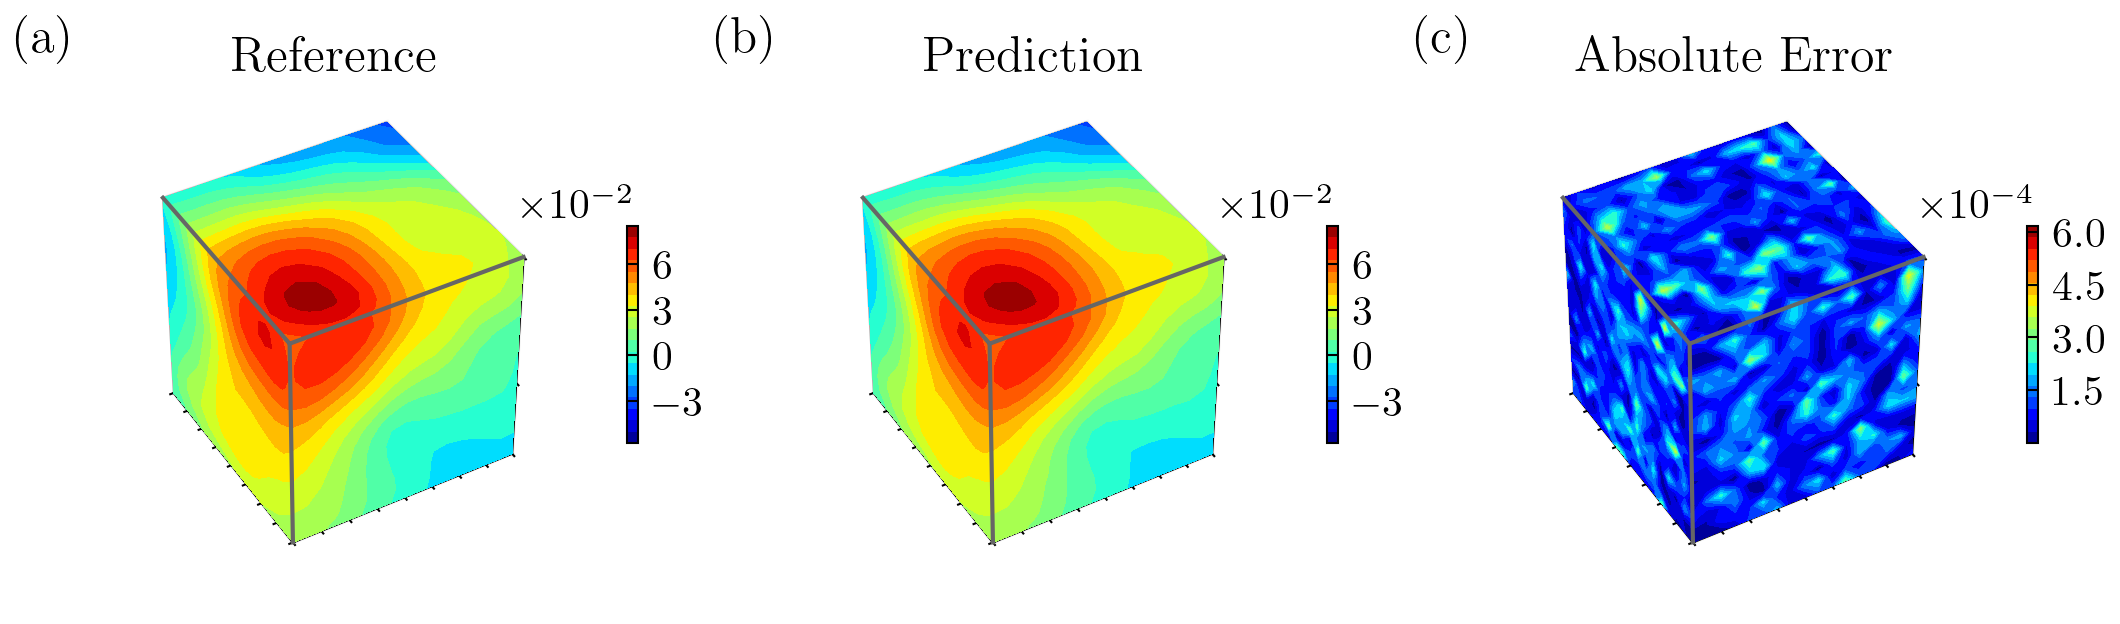

In [7]:
vis_3D_result(task="log3D", idx=10, outnm='log3D.pdf')

estimate cos(r) kernel
task : cos3D
u relative L2 : 3.6096e-03
task : cos3D
G relative L2 : 1.7454e-02


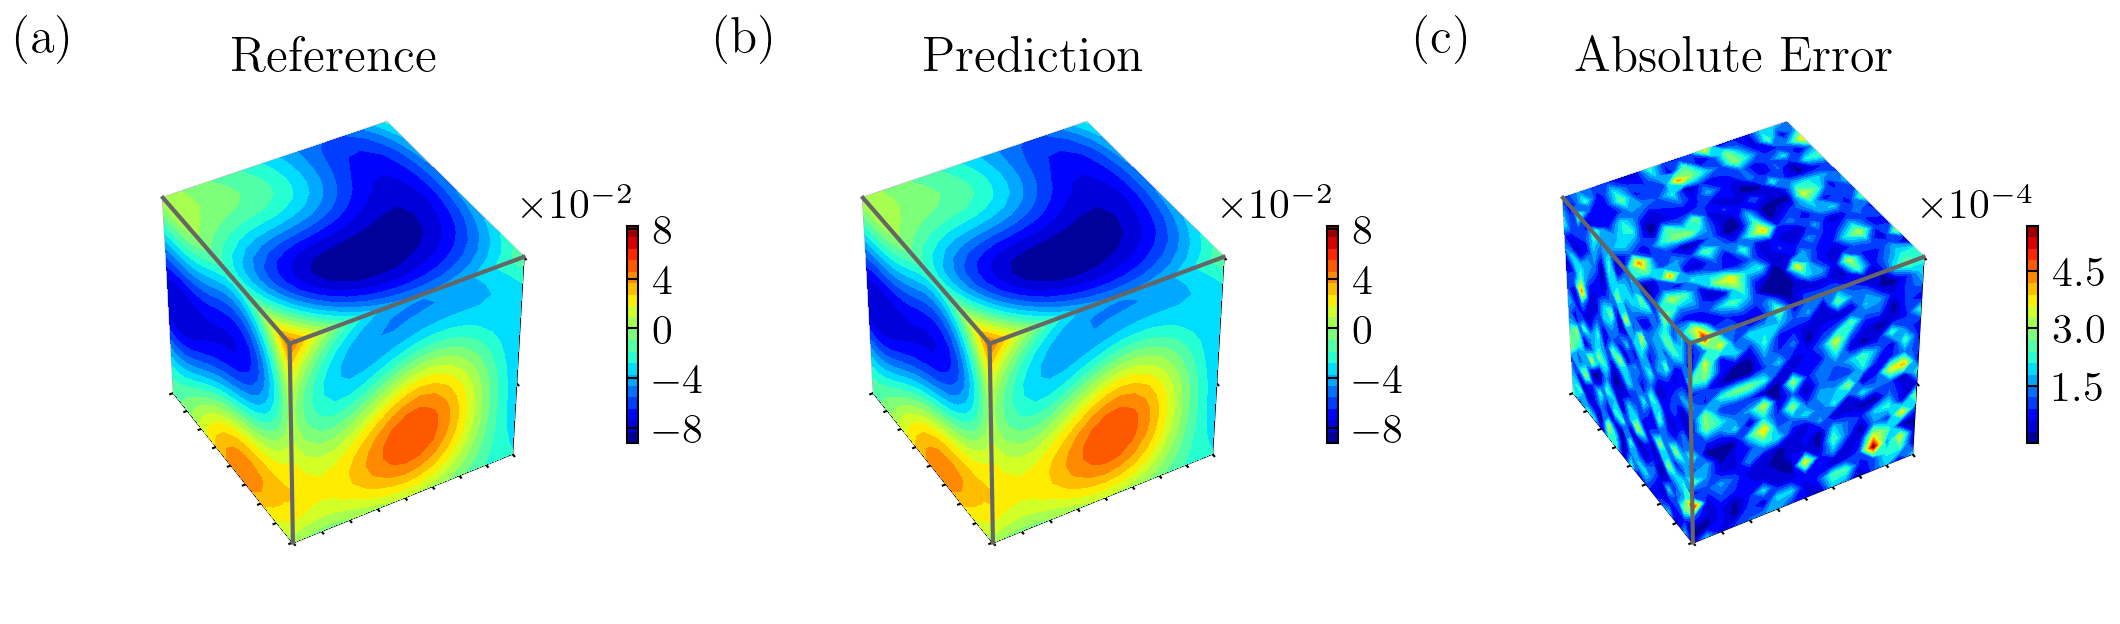

In [10]:
vis_3D_result(task="cos3D", idx=0, outnm='cos3D.pdf')

estimate log(r)*cos(kr) kernel, k=2
task : logcos3D
u relative L2 : 1.0424e-02
task : logcos3D
G relative L2 : 5.0047e-02


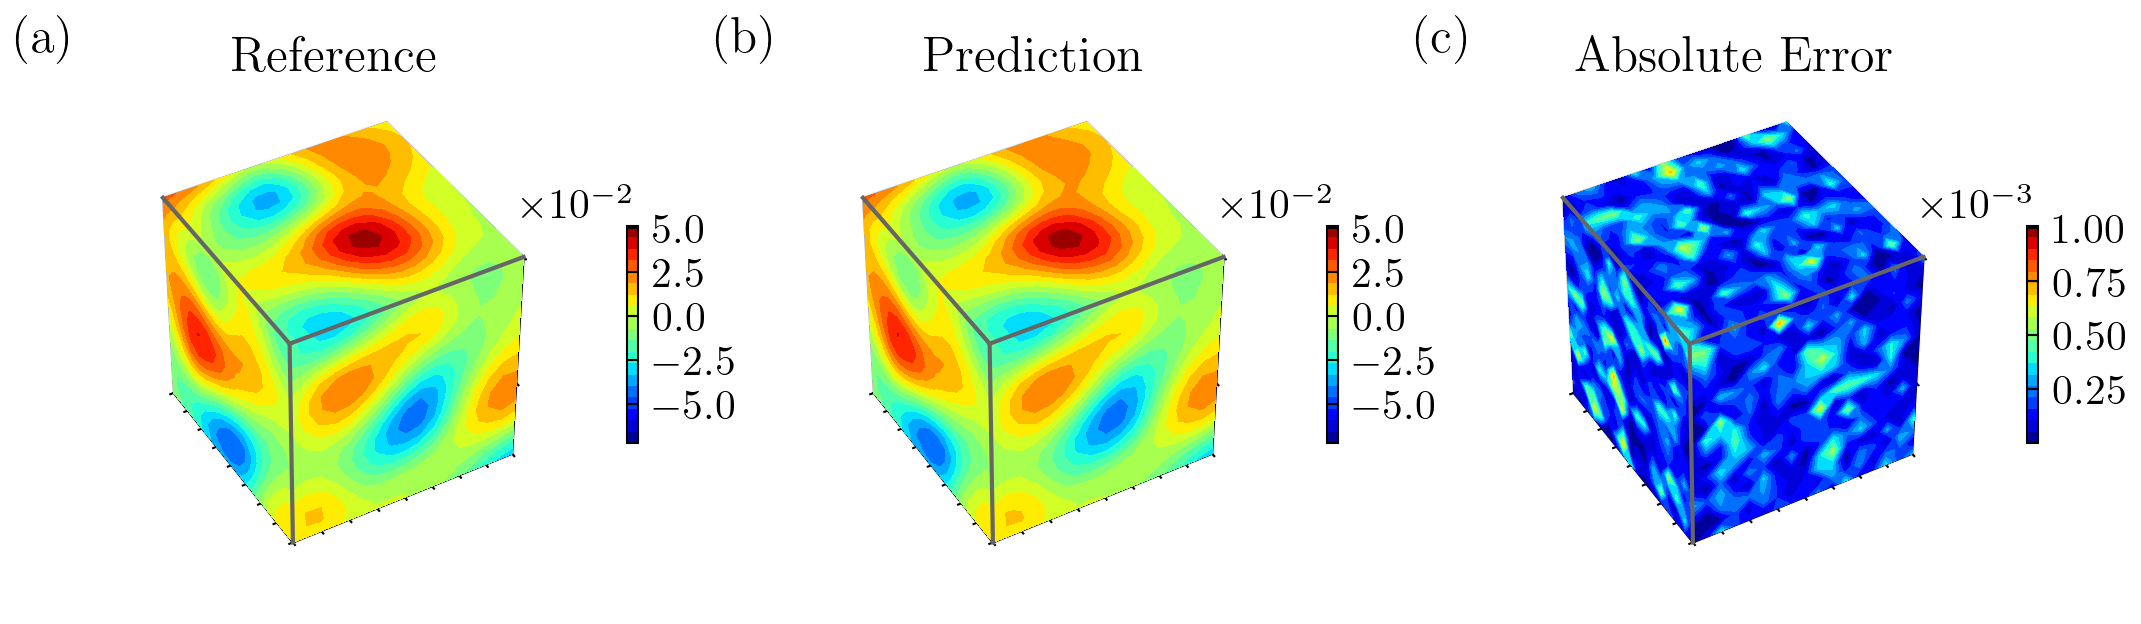

In [15]:
vis_3D_result(task="logcos3D", idx=0, outnm='logcos3D.pdf')

estimate log(r)*sin(kr) kernel, k=2
task : logsin3D
u relative L2 : 6.4519e-03
task : logsin3D
G relative L2 : 3.1002e-02


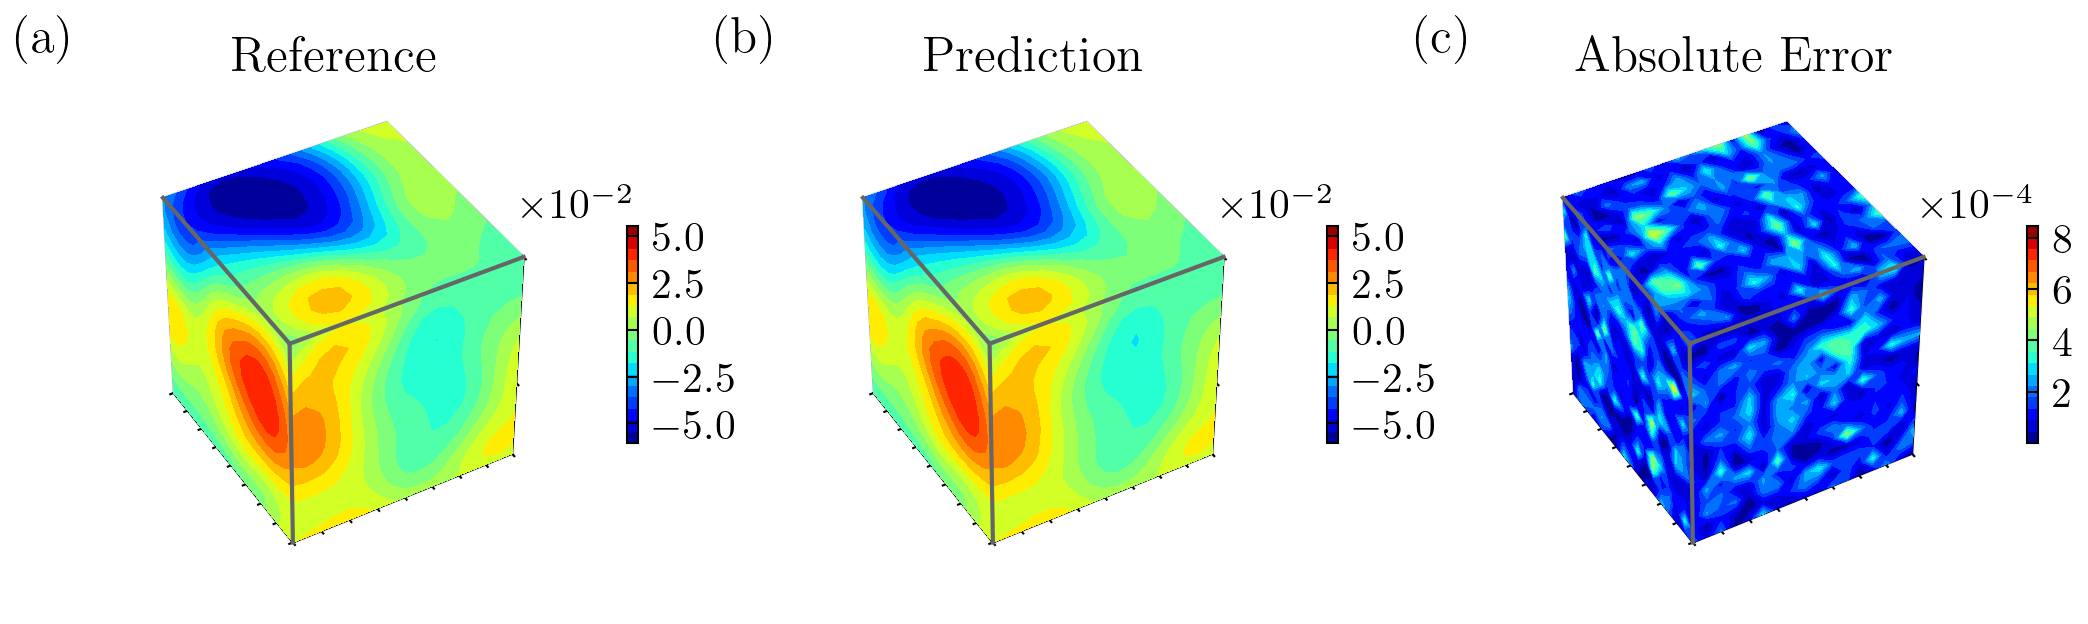

In [16]:
vis_3D_result(task="logsin3D", idx=0, outnm='logsin3D.pdf')

In [3]:
from utils import load_logsin3d_kernel_dataset
fTrain, fTest, uTrain, uTest, X, Gref = load_logsin3d_kernel_dataset(
    data_root='../data', nTrain=3000, nTest=1000)
upred = np.load(
    "../results/logsin3D/ogapw-513-3000-relu/upred.npy", allow_pickle=True) 
Gpred = np.load(
    "../results/logsin3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)

estimate log(r)*sin(kr) kernel, k=2


estimate log(r) kernel


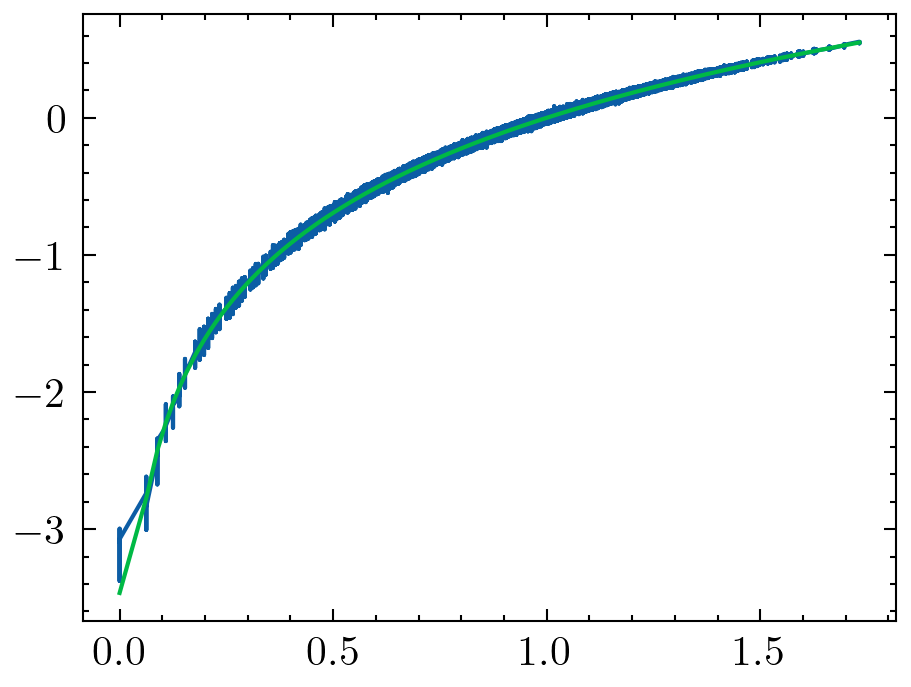

In [13]:
from utils import load_log3d_kernel_dataset
fTrain, fTest, uTrain, uTest, X, Gref = load_log3d_kernel_dataset(
    data_root='../data', nTrain=3000, nTest=1000)
Gpred = np.load("../results/log3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)

Gref = Gref.reshape(-1)
a = (X[:,[0]] - X[:,[3]])**2
b = (X[:,[1]] - X[:,[4]])**2
c = (X[:,[2]] - X[:,[5]])**2
r = ((a + b + c)**0.5).reshape(-1)

Gpred = Gpred.reshape(-1)
idx = np.argsort(r)

plt.plot(r[idx], Gpred[idx])
plt.plot(r[idx], Gref[idx])

estimate log(r)*sin(kr) kernel, k=2


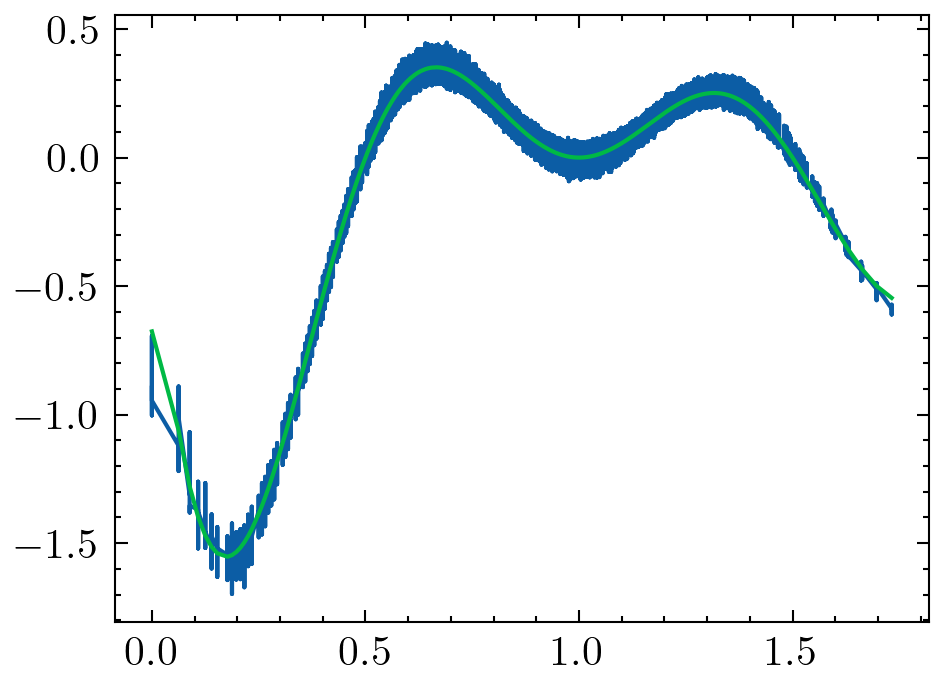

In [19]:
from utils import load_logsin3d_kernel_dataset
fTrain, fTest, uTrain, uTest, X, Gref = load_logsin3d_kernel_dataset(
    data_root='../data', nTrain=3000, nTest=1000)
Gpred = np.load("../results/logsin3D/ogapw-513-3000-relu/Goga.npy", allow_pickle=True)

Gref = Gref.reshape(-1)
a = (X[:,[0]] - X[:,[3]])**2
b = (X[:,[1]] - X[:,[4]])**2
c = (X[:,[2]] - X[:,[5]])**2
r = ((a + b + c)**0.5).reshape(-1)

Gpred = Gpred.reshape(-1)
idx = np.argsort(r)

plt.plot(r[idx], Gpred[idx])
plt.plot(r[idx], Gref[idx])